# <Center> Enigma Machine Learning Code Fest - Model Development</Center>

In [20]:
import os
os.chdir('E:/Anupam/HomeDocs/DataScience/UpX-Academy/Hackathon/Enigma/Dataset/')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
#PCA
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

C:\Users\Anupam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
train_dataset = pd.read_csv ('train_EDA.csv')
test_dataset = pd.read_csv ('test_EDA.csv')
train_dataset.head()

,ID,Reputation,Answers,Username,Views,Upvotes,Total_Answers_by_User,Tag_c,Tag_h,Tag_i,...,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,52664,3942,2,155623,7855,42,0.0,0,0,0,...,0,0,0,0,0,1891.02,1.04,0.23,0.52,0.48
1,327662,26046,12,21781,55801,1175,12.0,0,0,0,...,0,0,0,0,0,13433.57,7.41,1.64,3.46,2.89
2,468453,1358,4,56177,8067,60,0.0,1,0,0,...,0,0,0,0,0,1942.06,1.07,0.24,0.18,0.96
3,96996,264,3,168793,27064,9,0.0,0,0,0,...,0,0,0,0,0,6515.41,3.60,0.79,0.04,0.72
4,131465,4271,4,112223,13986,83,0.0,1,0,0,...,0,0,0,0,0,3367.00,1.86,0.41,0.57,0.96


In [4]:
train_dataset.info()
train_dataset[train_dataset.columns[train_dataset.isnull().any()]].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
ID                       299 non-null int64
Reputation               299 non-null int64
Answers                  299 non-null int64
Username                 299 non-null int64
Views                    299 non-null int64
Upvotes                  299 non-null int64
Total_Answers_by_User    299 non-null float64
Tag_c                    299 non-null int64
Tag_h                    299 non-null int64
Tag_i                    299 non-null int64
Tag_j                    299 non-null int64
Tag_o                    299 non-null int64
Tag_p                    299 non-null int64
Tag_r                    299 non-null int64
Tag_s                    299 non-null int64
Tag_x                    299 non-null int64
Views_per_Answer         299 non-null float64
Views_per_Reputation     299 non-null float64
Views_Scale              299 non-null float64
Reputation_Scale         299 non-null float64
Answe

Series([], dtype: float64)

## Normalize the dataframe

In [5]:
from sklearn import preprocessing
train_dataset_normalized = train_dataset.drop(['ID','Username', 'Upvotes'], axis=1)
train_dataset_normalized = pd.DataFrame(preprocessing.scale(train_dataset_normalized), \
                                        columns = train_dataset_normalized.columns)

# Normalize the test dataset also
test_dataset_normalized = test_dataset.drop(['ID','Username'], axis=1)
test_dataset_normalized = pd.DataFrame(preprocessing.scale(test_dataset_normalized), \
                                        columns = test_dataset_normalized.columns)
train_dataset_normalized.head()

,Reputation,Answers,Views,Total_Answers_by_User,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,-0.158982,-0.524248,-0.302833,-0.242558,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.302833,-0.303161,-0.302865,-0.160349,-0.524201
1,0.821670,1.909761,0.250135,2.573945,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,0.250135,0.249717,0.251901,0.821311,1.910752
2,-0.273622,-0.037446,-0.300388,-0.242558,1.916214,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.300388,-0.300557,-0.298931,-0.273874,-0.039231
3,-0.322158,-0.280847,-0.081293,-0.242558,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.081293,-0.080968,-0.082533,-0.320620,-0.281716
4,-0.144386,-0.037446,-0.232123,-0.242558,1.916214,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.232123,-0.231990,-0.232044,-0.143654,-0.039231


### Split the dataset into train and validate

In [6]:
feature_cols = ['Reputation', 'Answers', 'Views', 'Total_Answers_by_User', 'Views_per_Answer', 'Views_per_Reputation', \
                'Views_Scale', 'Reputation_Scale', 'Answers_Scale']
X = train_dataset_normalized [feature_cols]
y = train_dataset.Upvotes

## Perform PCA analysis for Dimentionality Reduction

In [7]:
#Get the output variable in the label separately
label = y.values
predictors = X.values

In [10]:
#Build the PCA model
pca = PCA(n_components = len(X.columns))
pca.fit_transform(predictors)
variance_ratio = pca.explained_variance_ratio_
display(variance_ratio)
display(pca.explained_variance_)

array([6.20414373e-01, 2.26741364e-01, 1.31264044e-01, 2.15797965e-02,
       2.71079139e-07, 1.00800918e-07, 4.61948483e-08, 4.84897823e-09,
       9.63497763e-16])

array([5.60246670e+00, 2.04752017e+00, 1.18534075e+00, 1.94869907e-01,
       2.44789921e-06, 9.10252581e-07, 4.17148781e-07, 4.37872497e-08,
       8.70057879e-15])

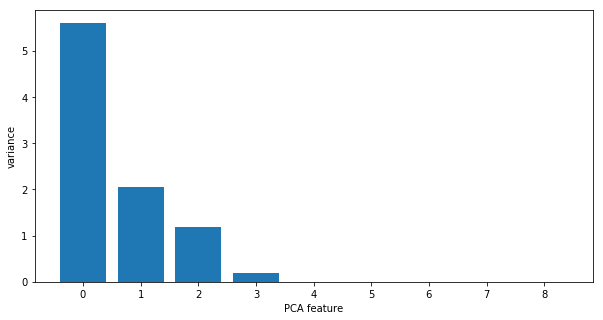

In [11]:
#Plot the Scree Plot
#scree plot
plt.figure(figsize=[10,5])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

array([ 62.04,  84.71,  97.84, 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  ])

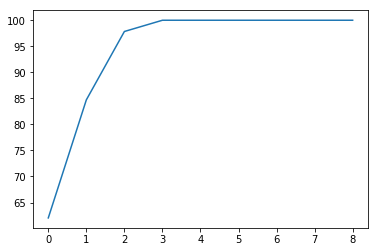

In [12]:
#Plot the cumulating sum of variance ratio
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)
plt.plot(variance_ratio_cum_sum)

In [13]:
#Now build the model with chosen number of Principal Components
pca = PCA(n_components = 4)
train_pca = pca.fit_transform(predictors)  
test_pca = pca.fit_transform(test_dataset_normalized)
print(test_pca)

[[ 4.42165871e-02 -2.43980939e-01 -3.00504928e-01 -3.18515640e-02]
 [-1.32315692e-01 -6.75400274e-02  1.94899820e+00 -2.01909142e-01]
 [-7.35849730e-01 -2.31070466e-01 -9.67085924e-01 -3.35286904e-01]
 [ 2.39858548e-01  1.25343556e+00  3.31111395e-02 -2.05960970e-01]
 [ 2.83795117e+00  2.95533966e+00  1.53213059e+00 -1.13254673e-01]
 [-1.16430869e+00 -8.31901383e-01 -5.40080779e-03 -3.93282854e-01]
 [-4.93121842e-02 -1.13602408e+00 -1.46824515e+00 -6.71482374e-01]
 [ 7.87240912e-01 -5.30995941e-01  8.96971772e-02 -3.67677276e-01]
 [-1.06844849e+00 -3.90169488e-01 -6.34126842e-01 -4.72363328e-01]
 [-4.07437281e-01  5.42504867e-01 -3.23366665e-01  2.23005627e+00]
 [-9.09085876e-01  1.83386223e-02 -7.07624807e-01  2.18098799e+00]
 [-5.03551516e-01 -4.07390663e-01 -1.15701506e+00 -5.14470083e-01]
 [-7.12544827e-01  2.20904281e-01 -2.94064191e-01 -1.21625131e-01]
 [ 4.58409297e+00  3.81488909e-01 -2.77996829e-01  2.18901643e+00]
 [ 1.79161391e+00  1.77955079e+00  1.65519912e+00 -2.42283235e

In [14]:
# Dump the principal components relation with features
pd.DataFrame(pca.components_, columns = test_dataset_normalized.columns, index = ['PC-1', 'PC-2', 'PC-3', 'PC-4'])


,Reputation,Answers,Views,Total_Answers_by_User,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
PC-1,-0.009855,0.296035,0.422263,0.279915,-0.023145,-0.019417,-0.026887,0.001259,-0.006407,0.005342,-0.025157,-0.061796,0.163476,0.422263,0.422262,0.422245,-0.009856,0.296184
PC-2,-0.381916,0.406736,-0.199533,0.376267,-0.181062,-0.032294,0.097541,0.116677,-0.002717,0.004682,-0.037175,-0.026612,-0.132351,-0.199533,-0.199524,-0.199588,-0.381948,0.406673
PC-3,0.544512,0.291236,-0.129383,0.254912,0.237492,-0.054561,-0.045341,0.028202,-0.004761,-0.072911,-0.055063,-0.136281,-0.127428,-0.129383,-0.129388,-0.129394,0.544516,0.291265
PC-4,0.035949,0.037017,-0.014256,0.002469,-0.133687,-0.037196,-0.080639,-0.468509,-0.019966,0.848684,-0.033715,-0.128136,-0.101831,-0.014256,-0.014271,-0.014266,0.036008,0.037051


In [15]:
variance_ratio_cum_sum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4) * 100)
display(variance_ratio_cum_sum)


array([26.97, 38.93, 50.57, 57.26])

Text(204,0.5,'Principal components')

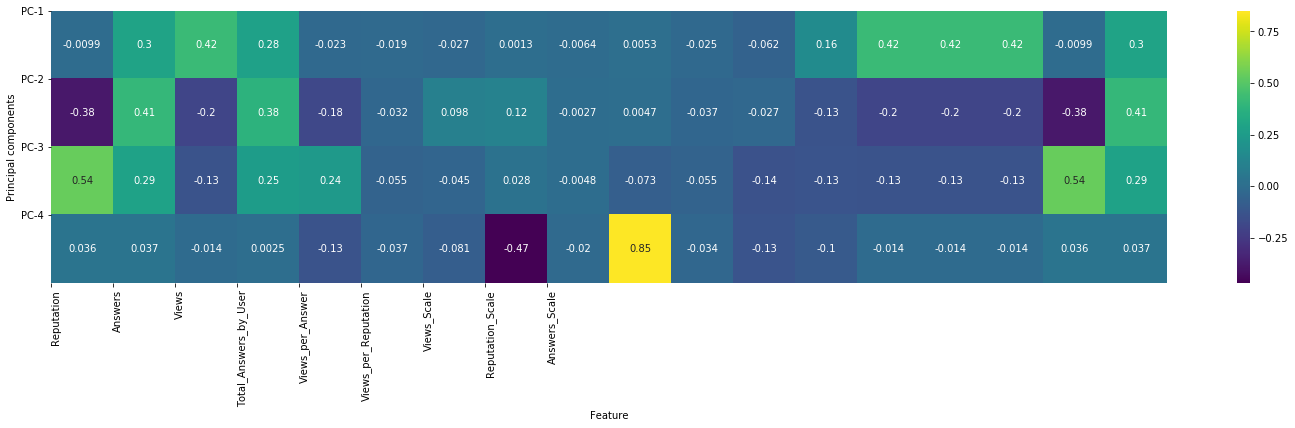

In [16]:
# Plot the heat map displaying compliance of principal components with input feature
plt.figure(figsize=[25,5])
sns.heatmap(pca.components_[0:10,:], annot = True, cmap = 'viridis')
plt.yticks([0,1,2,3], ["PC-1", "PC-2", "PC-3", "PC-4"], rotation = 360, ha = "right")
plt.xticks(range(len(features)), feature_cols, rotation=90, ha = "left")
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(train_pca, y, test_size=0.33, random_state=3)
#train_pca.shape

### Compare the accuracy of the algorithms

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [23]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=3)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring = 'mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -2238542.074992 (1985073.972498)
LDA: -1070854.577815 (2132149.664273)
KNN: -1762904.625400 (1863186.450935)
LASSO: -2235826.109238 (1983572.678078)
EN: -1901464.411866 (1771027.057321)
DecisionTree: -2140792.795000 (1284713.284329)
SVR: -2978104.187197 (2900762.001990)


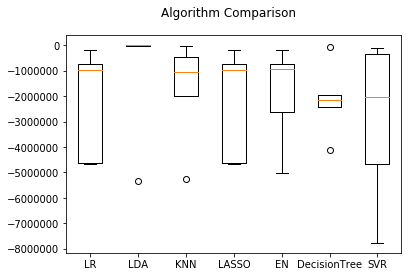

In [24]:
# boxplot algorithm comparison
fig = plt.figure()

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Inference
1. Linier Regression, KNN and Support Vector Regression seems to a better algorithm

## Build the Linier Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

In [26]:
#Build the linier regression model
linreg = LinearRegression()
model = linreg.fit(X_train, y_train)
# Display the intercept and coefficient
display (linreg.intercept_)
display (linreg.coef_)
list(zip(feature_cols, linreg.coef_))

345.5291657330672

array([ 382.48840787,  435.29900944, -196.94469625, -470.87078893])

[('Reputation', 382.48840786599305),
 ('Answers', 435.29900944117594),
 ('Views', -196.9446962468657),
 ('Total_Answers_by_User', -470.87078893420784)]

In [27]:
y_pred  = model.predict(X_validate)
y_pred

array([ 370.68709951,  197.97625367,   75.66494493,  -65.69942656,
       -132.53964572, -176.7253946 ,   -5.49333621, 2450.31076009,
        -38.42834489, -164.57435125, -171.95543978, -181.80302085,
        -98.10152978, -104.36234443, -163.49127793,  442.35763968,
         13.86406326,   87.52826687,  140.99985107, 1555.53609796,
         34.84211794, 3015.37428843,  -21.39708327,  144.62217402,
         32.30941459,   96.4135871 , -118.11307829,   29.59612585,
       1191.65542939, -171.30424227,  -71.44574139,    4.84999273,
         53.262062  ,  160.74352268, 1451.25033007,  371.99917485,
       -132.36484417, -145.35226378, -170.32179179,  -67.37704201,
        893.57936036,   71.7740758 ,   25.57294894, -104.16936866,
       2227.61950866,  149.77500077,  447.52687876, -156.37383256,
       -187.64063894,   78.23088494,  111.62465801,  244.08700544,
       -138.99228819,   58.32630424,  -34.60984595, 4139.72778003,
       -124.19300037, 2972.52899292,  -50.49391114, -150.58761

In [28]:
rmse_value = np.sqrt(metrics.mean_squared_error(y_validate, y_pred))
rmse_value

1003.9052717392406

In [29]:
# Coefficient of determination or R squared value on training dataset
display(model.score(X_train,y_train))

0.536197108553071

In [30]:
# Coefficient of determination or R squared value on test dataset
metrics.r2_score(y_validate,y_pred)

0.1667133659221428

In [31]:
pred_test = linreg.predict(test_pca)

In [32]:
# Output the Dataframe into a CSV file
test_dataset['Upvotes'] = pred_test
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_LR.csv',  index = False)

## Build the K Nearest Neighbours Model

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
knn_reggression = KNeighborsRegressor(n_neighbors = 5)
knn_reggression = knn_reggression.fit(X_train, y_train)

In [35]:
y_pred = knn_reggression.predict(X_validate)
y_pred

array([ 164.4,  300.6,   25.8,   27.4,    9.2,   21.6,   12.4,  198.4,
         27.4,    5.2,   21.6,   20.4,   35.8,   28.8,   43.4,  132. ,
         38. ,   77.6,   52.4, 1850.2,  136.4,  594.2,   43.8,  121.8,
         24.8,   32. ,   26.8,   12.4,  609. ,    6.4,   37.4,   20.6,
         36.4,   33.2,  980.2,  102.8,    9.8,    7.4,   21.6,   40. ,
        121.8,  140.2,   24.8,   10.8,  215. ,   41.8,  274.6,   43.4,
          6.8,   31.6,   46.4,   41.2,   10. ,   62. ,   27.4,  386. ,
          9.8,  547.2,   55.2,    7.2,    9. ,   23. ,   22. ,    7.2,
          5.2,    7.8,   12. ,   16.4,   58.4,   27.4,  106.2,   29.8,
         10. , 4626.4,    9.6,    8.2,   41.2,    5.4, 3095.4,   42.6,
       1112. ,   10. ,   37.8,   62.2,  126.6,  276.2,   17. ,   27.4,
         10.8,   27. ,   32. ,    7.6,   44.8,   27.4,    6.2,   44.8,
         47.4,    8.4,    6.8])

In [36]:
rmse_value = np.sqrt(metrics.mean_squared_error(y_validate, y_pred))
rmse_value

1070.549810974612

In [37]:
# Coefficient of determination or R squared value on training dataset
knn_reggression.score(X_train,y_train)


0.573713639623644

In [38]:
# Coefficient of determination or R squared value on test dataset
metrics.r2_score(y_validate,y_pred)

0.05240512235729167

In [39]:
pred_test = knn_reggression.predict(test_pca)

In [40]:
# Output the Dataframe into a CSV file
test_dataset['Upvotes'] = pred_test
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_KNN.csv',  index = False)

## Build the Random Forest Model

In [41]:
train_dataset_normalized.head()

,Reputation,Answers,Views,Total_Answers_by_User,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x,Views_per_Answer,Views_per_Reputation,Views_Scale,Reputation_Scale,Answers_Scale
0,-0.158982,-0.524248,-0.302833,-0.242558,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.302833,-0.303161,-0.302865,-0.160349,-0.524201
1,0.821670,1.909761,0.250135,2.573945,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,0.250135,0.249717,0.251901,0.821311,1.910752
2,-0.273622,-0.037446,-0.300388,-0.242558,1.916214,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.300388,-0.300557,-0.298931,-0.273874,-0.039231
3,-0.322158,-0.280847,-0.081293,-0.242558,-0.521862,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.081293,-0.080968,-0.082533,-0.320620,-0.281716
4,-0.144386,-0.037446,-0.232123,-0.242558,1.916214,-0.260494,-0.327731,-0.532223,-0.221637,-0.358193,-0.213201,-0.26774,-0.100673,-0.232123,-0.231990,-0.232044,-0.143654,-0.039231


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:
model = tree.DecisionTreeRegressor(random_state = 123)
#model = model.fit(X_train, y_train)


In [44]:
# Tune the hyper parameter
params = {"max_depth": [3, 25], "min_samples_split": [5,50]}
from sklearn.grid_search import GridSearchCV
grid=GridSearchCV(model,params, cv = 5)
grid_model = grid.fit(X_train,y_train)
grid_model.best_params_


{'max_depth': 25, 'min_samples_split': 5}

In [45]:
grid_pred=grid_model.predict(X_validate)

In [46]:
#The feature_importances_ attribute make it simple to interpret the significance of the predictors you include
print(grid_model.score(X_train, y_train))
print(grid_model.score(X_validate, y_validate))


0.7285102270197907
-0.6415310405159682


In [47]:
pred = grid_model.predict(X_validate)
pred_test = grid_model.predict(test_pca)
pred_test

array([4.55000000e+01, 3.63000000e+02, 4.20000000e+01, 1.72000000e+02,
       2.93500000e+03, 1.43333333e+01, 7.25000000e+00, 5.55500000e+02,
       1.75000000e+00, 2.69250000e+02, 2.00000000e+01, 7.25000000e+00,
       3.40000000e+01, 1.41100000e+03, 1.23200000e+03, 2.20000000e+01,
       2.06666667e+01, 1.15666667e+02, 8.14000000e+02, 8.47500000e+01,
       2.55000000e+01, 3.63000000e+02, 4.20000000e+01, 8.60000000e+01,
       2.93500000e+03, 1.72000000e+02, 1.00750000e+02, 1.15666667e+02,
       1.75000000e+00, 2.00000000e+01, 2.55000000e+01, 1.15666667e+02,
       7.25000000e+00, 1.40000000e+01, 8.60000000e+01, 2.06666667e+01,
       7.25000000e+00, 2.69250000e+02, 4.20000000e+01, 2.00000000e+01,
       1.50000000e+01, 2.13766667e+03, 1.75000000e+00, 3.63000000e+02,
       1.75000000e+00, 7.25000000e+00, 1.72000000e+02, 1.41100000e+03,
       3.00000000e+00, 8.60000000e+01, 1.15666667e+02, 1.23200000e+03,
       1.75000000e+00, 2.69250000e+02, 3.00000000e+00, 7.25000000e+00,
      

In [48]:
test_dataset['Upvotes'] = pred_test

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

forest = RandomForestRegressor(n_estimators = 5, random_state = 3, verbose=1)
my_forest = forest.fit(X_train, y_train)
print(my_forest.score(X_train, y_train))

y_predict  = my_forest.predict(X_validate)
print(my_forest.score(X_validate, y_validate))
rmse = math.sqrt(mean_squared_error(y_validate, y_predict))
print('RMSE:' , rmse)

print(my_forest.feature_importances_)
list(zip(feature_cols, my_forest.feature_importances_))

0.9796008844994457
-1.0766318865100257
RMSE: 1584.8030051878768
[0.38415362 0.32753047 0.08014633 0.20816958]


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


[('Reputation', 0.38415361521067204),
 ('Answers', 0.32753047369316124),
 ('Views', 0.0801463348742618),
 ('Total_Answers_by_User', 0.2081695762219049)]

In [50]:
# Output the Dataframe into a CSV file
test_dataset[['ID', 'Upvotes']].to_csv('Submission_Anupam_RF.csv',  index = False)